<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/ML/Load_Kaggle_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Fine Food Reviews Dataset using Kaggle API**

🎯 **Goal:** We want to build a model to sentimentally analyze food reviews.

🗄️ **Dataset:** Amazon Fine Food Reviews Analysis ([link](https://www.kaggle.com/snap/amazon-fine-food-reviews) - 	
568,454 reviews by 256,059 users on 74,258 products)


**1. Import Libraries**

In [39]:
import numpy as np
import pandas as pd
from google.colab import files

**2. Import the Dataset**

2.1. Using Kaggle API to download data

In [6]:
!pip install kaggle

In [10]:
# Uploading kaggle.json for accessing the API
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [11]:
!kaggle datasets download "snap/amazon-fine-food-reviews"

 97% 234M/242M [00:05<00:00, 69.8MB/s]
100% 242M/242M [00:05<00:00, 48.7MB/s]


In [12]:
!unzip amazon-fine-food-reviews

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


2.2. Adding data into a DataFrame

In [20]:
# Reading the unzipped file and loading it to a DataFrame
reviewsDF = pd.read_csv("/content/Reviews.csv")
# A brief summary
print(f'There are {len(reviewsDF)} rows containing food review data [{reviewsDF.shape}]')
reviewsDF.head()

There are 568454 rows containing food review data [(568454, 10)]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


2.3. Cleaning Data

In [22]:
# Keep only useful columns
reviewsDF = reviewsDF[['ProductId', 'UserId', 'Score', 'Summary']]
# Remove duplictes (if any)
reviewsDF = reviewsDF.drop_duplicates(keep='first', inplace=False)
print(f'Now there are {len(reviewsDF)} rows [{reviewsDF.shape}]')
reviewsDF.head()

Now there are 566872 rows [(566872, 4)]


,ProductId,UserId,Score,Summary
0,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food
1,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised
2,B000LQOCH0,ABXLMWJIXXAIN,4,"""Delight"" says it all"
3,B000UA0QIQ,A395BORC6FGVXV,2,Cough Medicine
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy


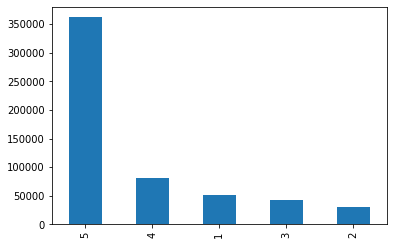

In [43]:
scoresDist = reviewsDF['Score'].value_counts()
scoresDist.plot(kind='bar')